In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson,norm 

**General Comment:** All plots must be presented appropriately, which entails including labels and legends. When requesting an analytic expression, please provide the entire derivation.

## The Poisson distribution

If $X$ follows a Poisson distribution with parameter $\lambda$, then the probability mass function (PMF) of $X$ is given by:
$$P_\lambda(X = k) =f(k,\lambda)= \frac{e^{-\lambda} \lambda^k}{k!},$$
where:
\begin{align*}
&\lambda \text{ is the parameter of the Poisson distribution,} \\
&k \text{ is a non-negative integer,} \\
&k! \text{ denotes the factorial of } k.
\end{align*}

Let $X_1, X_2, \ldots, X_n$ be a sequence of independent and identically distributed (i.i.d.) Poisson random variables with parameter $\lambda$. 

**Exercise 1:** What are the theoretical means, variances, and standard deviations of $X$ and $\bar X=\frac{1}{n}\sum_i^n X_i$? Express all the results as functions of $\lambda$ and $n$.

**Exercise 2:** Let's set $\lambda$ to 3.

Help: Utilize the `poisson` function within the `scipy.stats` package for the following tasks. You can find more information here: [scipy.stats.poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html).

**a.** Create a probability mass function (PMF) plot for $x$ in the range of 0 to 30.

**b.** Calculate the empirical mean and central moments of the distribution numerically, including variance, skewness, and kurtosis. You can use the `poisson.stats` function for this purpose.

**c.** Represent the empirical mean as a vertical line on the previous plot.

**Exercise 3:** Generate a synthetic dataset consisting of 10,000 Poisson random numbers with a parameter of $\lambda=3$. You can achieve this by employing the `poisson.rvs` function.

**a.** Create a normalized histogram of the dataset mentioned above. Compare it with the theoretical distribution used for data generation.

**b.** Obtain and compare the empirical and theoretical cumulative distributions of the dataset. 

**Exercise 4:** Derive the following estimators analytically:

**a.** Using the method of moments, propose an estimator $\hat\lambda$ for the parameter $\lambda$ as a function of a general data set (i.e. $\hat\lambda=g(X_1, X_2, \ldots, X_n)$).

**b.** Find the expression for the log-likelihood of the data $\mathcal{D}=\{X_1, X_2, \ldots, X_n\}$. Show that the maximum likelihood estimator (MLE) $\hat\lambda_\mathrm{MLE}$ is equal to the estimator obtained by the method of moments.

**c.** Prove that the sampling distribution for $\hat\lambda$ is 
$$P(\hat\lambda = k)=\frac{e^{-n\lambda} \left(n\lambda\right)^{nk}}{(nk)!}$$

What sampling distribution do you expect for large values of $n$? 

Help: If you add two independent Poisson distributed random variables, $X\sim P(\lambda_1)$ and $Y\sim P(\lambda_2)$, the result is also Poisson distributed and $X+Y\sim P(\lambda_1+\lambda_2)$. 
Use the Central Limit Theorem to obtain the expression for large $n$

**d.** Calculate the bias, mean square error (MSE), variance, and standard error of $\hat\lambda$. Is the estimator $\hat\lambda$ biased and/or consistent?

**e.** Using the results obtained in **d**, determine the estimated standard error of $\hat\lambda$, denoted $\hat{\mathrm{ SE }}_{\hat\lambda}$. You can use the method of moments for this calculation.

**f.** Obtain the same expression for the estimated standard error using Fisher information of $X$, denoted as $I(\lambda)=-\mathbb{E}\left[\frac{\partial^2}{\partial\lambda ^2} \log P_\lambda(X)\right]$.


**Exercise 5:** Address the following questions using the previously generated synthetic dataset.

**a.** Create a plot of the log-likelihood of the data as a function of $\lambda$. Indicate the value of the maximum of this function.

**b.** Provide an estimate for $\hat\lambda$ along with its standard error, denoted as $\hat{\mathrm{SE}}_{\hat\lambda}$.

**c.** Calculate a 95% confidence interval for the true parameter $\lambda$ using the central limit theorem.

Help. Function `scipy.stats.norm` will be useful for that.

**d.** Determine a 95% confidence interval for $\hat\lambda$ using the Bootstrap method and compare it to the previous interval.

**Exercise 6:** Repeat the entire experiment of generating $n$ random numbers $T=1000$ times. In each experiment indexed as $t$, calculate an estimate $\hat\lambda_t$, based on the observed data. Store the results from each experiment in an array and create a density histogram of the obtained results. Repeat this process for three different values of $n$: 10, 100, and 1000.

**a.** For each value of $n$, compare the histogram with both the theoretical sampling distribution for $\hat\lambda$ and the expected Gaussian behavior for large $n$.

**b.** For $n=1000$, verify that the true value of $\lambda$ ($\lambda=3$) is contained within the $1-\alpha$-confidence interval only in $1-\alpha$-percent of the $T$ experiments. Consider $\alpha=0.05$.

**Exercise 7: Hypothesis testing with real data**. 

Category 4 hurricanes are tropical cyclones. The file `Category4Hurricanes - Sheet1.csv` contains a list of all hurricanes recorded in the Atlantic Sea since 1850. We analyze the data under the hypothesis that the number of hurricanes per year follows a Poisson distribution with a certain parameter $\lambda$.

In the following code, I provide a way to extract the number of hurricanes recorded per year and a visualization of this data in a bar chart.

For the following, you can access to the years in `year_counts['Year']` and to the counts in `year_counts['Count']`.

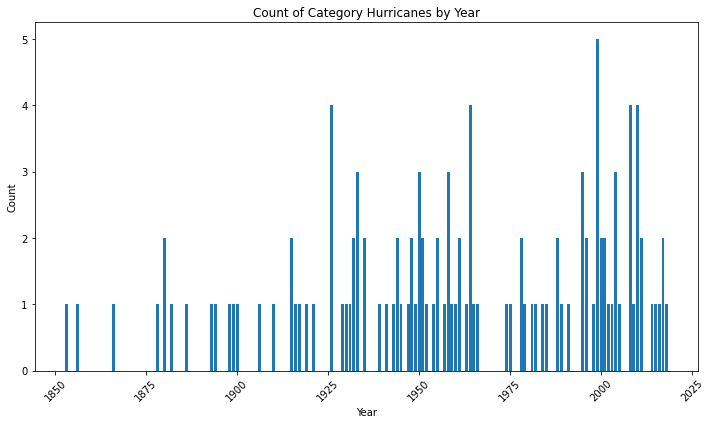

In [19]:
import pandas as pd

df = pd.read_csv('Category4Hurricanes - Sheet1.csv')
# Count the occurrences of each unique year and store it in a DataFrame
year_counts = df['Season'].value_counts().reset_index()
# Rename the columns for clarity
year_counts.columns = ['Year', 'Count']


# Sort the DataFrame by year if nee
year_counts = year_counts.sort_values(by='Year')


# Create a DataFrame with all possible years within the range of your data
all_years = pd.DataFrame({'Year': range(year_counts['Year'].min(), year_counts['Year'].max() + 1)})

# Merge the year_counts DataFrame with the all_years DataFrame, filling NaN values with zeros
year_counts = pd.merge(all_years, year_counts, on='Year', how='left').fillna(0)

year_counts['Count'] = year_counts['Count'].astype(int)

plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(year_counts['Year'], year_counts['Count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Category Hurricanes by Year')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

**a.** Plot a histogram of the number of observed hurricanes (the counts) by year and compare it to the Poisson distribution that would correspond to an estimate of $\lambda$ using all historical count data.

**b.** In the chart displayed above, it is evident that the frequency of hurricanes has been on the rise over time. The Atlantic hurricane reanalysis project (more details can be found at https://en.wikipedia.org/wiki/Atlantic_hurricane_reanalysis_project) recognized as early as 1957 that the increasing trend in the number of tropical cyclones each season in the Atlantic Basin was, in part, attributed to improved observations and better record-keeping. However, what is notable is that the average number of hurricanes per year appears to continue increasing year after year. 

With this in mind, let's estimate $\lambda_0$ using $\hat\lambda_\text{old}$ obtained by analyzing data from 1950 to 1999. We'll also estimate $\hat\lambda_\text{new}$ using data from 2000 onwards. Then, create histograms representing the hurricane counts recorded in each of these two time periods and compare them with the Poisson distributions with $\lambda$ equal to $\hat\lambda_\text{old}$ and $\hat\lambda_\text{new}$. 

**c.**  Now, our objective is to test the hypothesis that there has been a change in the frequency of hurricanes in recent years. To achieve this, we formulate the following hypotheses:

$H_0$: Nothing has changed, which implies $\lambda=\lambda_\mathrm{old}$

$H_1$: There is a change, meaning $\lambda\neq\lambda_\mathrm{old}$

In our hypothesis test, we will reject the null hypothesis $H_0$ if the estimate $\hat\lambda_\mathrm{new}$ is greater than a critical value $\lambda_\alpha$, where $\alpha$ represents the significance level.

To determine the value of $\lambda_\alpha$ for rejecting the null hypothesis at a significance level of $\alpha=0.05$, you can leverage the previously derived null distribution for $\hat\lambda$, which is expressed as:

$$P(\hat\lambda = x) = \frac{e^{-n\lambda_\mathrm{old}} \left(n\lambda_\mathrm{old}\right)^{nx}}{(nx)!} = f(nx,n\lambda_\mathrm{old}),$$
where $f(x,\lambda)$ is the Poisson distribution defined at the begining of this notebook.

Help: You can obtain $\lambda_\alpha$ using the cumulative distribution function (CDF) of the Poisson distribution.

**d.** Do we accept the hypothesis? Which is the p-value?